In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

#Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [2]:
print("=" * 60)
print("Part 1: Creating make_circles Dataset")
print("=" * 60)

n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42,
    factor=0.5,
)
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"Class 0 samples {sum(y==0)}, \
        Class 1 samples {sum(y == 1)}")


Part 1: Creating make_circles Dataset
X shape: (1000, 2), y shape: (1000,)
Class 0 samples 500,         Class 1 samples 500



Part 2: Visualizing the Data


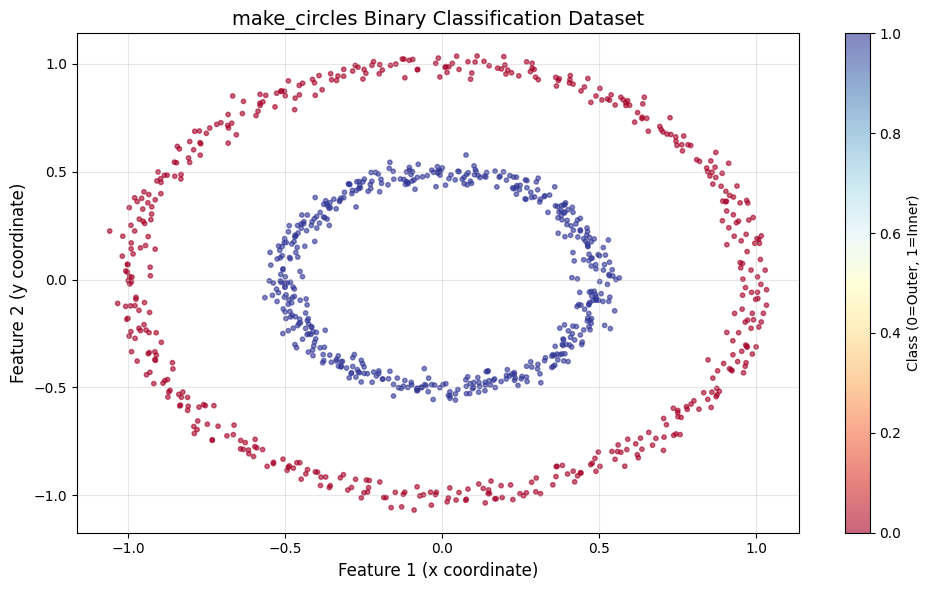

Visualization created!
Motto: Visualize, visualize, visualize!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Visualizing the Data")
print("=" * 60)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
plt.title('make_circles Binary Classification Dataset', fontsize=14)
plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Class (0=Outer, 1=Inner)')
plt.tight_layout()
plt.show()

print("Visualization created!")
print("Motto: Visualize, visualize, visualize!")


Part 3: Train/Test Split
Training size: 800 (80.0)%
Testing size: 200 (20.0)%


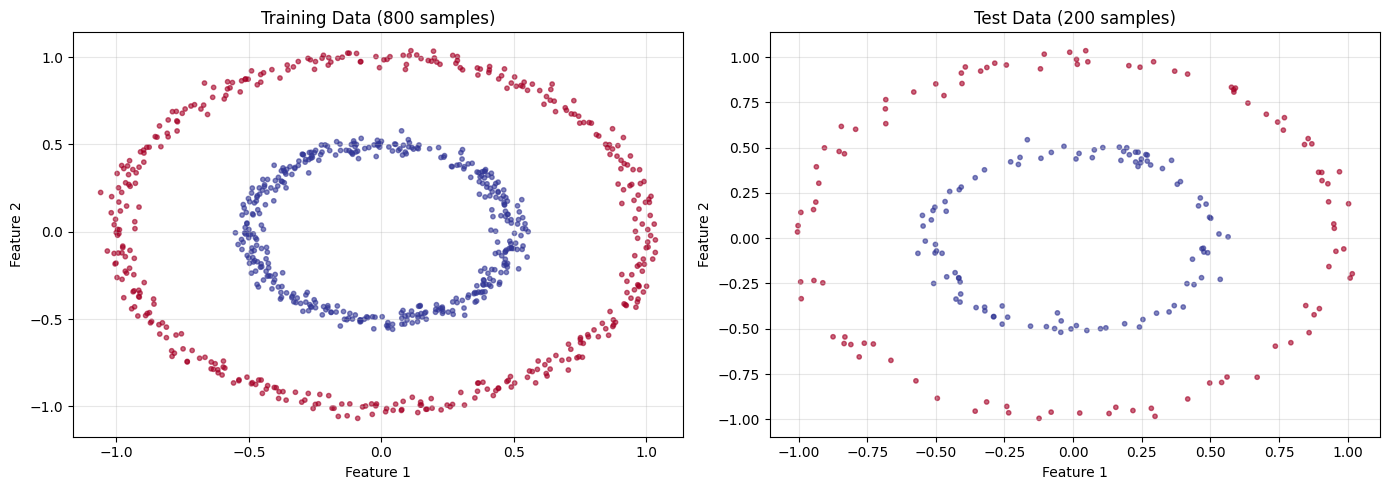

In [4]:
print("\n" + "=" * 60)
print("Part 3: Train/Test Split")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training size: {len(X_train)} ({len(X_train)/len(X)*100:.1f})%")
print(f"Testing size: {len(X_test)} ({len(X_test)/len(X)*100:.1f})%")

#Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', s=10, alpha=0.6)
axes[0].set_title(f'Training Data ({len(X_train)} samples)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', s=10, alpha=0.6)
axes[1].set_title(f'Test Data ({len(X_test)} samples)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
print("\n" + "=" * 60)
print("Part 4: Device-Agnostic Setup")
print("=" * 60)

#Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# Convert to PyTorch tensors and move to device
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

print(f"\nTensor shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTensor data types:")
print(f"X_train: {X_train.dtype}")
print(f"y_train: {y_train.dtype}")


Part 4: Device-Agnostic Setup
Device: cpu

Tensor shapes:
X_train: torch.Size([800, 2])
y_train: torch.Size([800, 1])
X_test: torch.Size([200, 2])
y_test: torch.Size([200, 1])

Tensor data types:
X_train: torch.float32
y_train: torch.float32


In [6]:
print("\n" + "=" * 60)
print("Part 5: Building CircleModelV0 (Linear)")
print("=" * 60)

class CircleModelV0(nn.Module):
    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
             #Note: No activation (linear model)
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, x):
        return self.layer_stack(x)

#Create the model
model = CircleModelV0(input_size=2, hidden_size=8, output_size=1)
model = model.to(device)
print(model)

#Count parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal parameters: {total_params:,}")


Part 5: Building CircleModelV0 (Linear)
CircleModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

Total parameters: 33


In [7]:
print("\n" + "=" * 60)
print("Part 6: Initial Predictions")
print("=" * 60)

model.eval()
with torch.inference_mode():
    #Foward pass (raw logits)
    test_logits = model(X_test)

    #Convert to probabilities
    test_probs = torch.sigmoid(test_logits)

    #Convert probabilities to class labels
    test_preds = (test_probs > 0.5).long()

#Show some examples
print(f"\nFirst 5 predictions:")
for i in range(5):
    print(f" Sample {i+1}")
    print(f" Logits: {test_logits[i]}")
    print(f"Probabilities: {test_probs[i]}")
    print(f"Predicted: {test_preds[i].item()} \
            Actual: {y_test[i].item()}")

#Calculate initial accuracy
accuracy = (test_preds == y_test).float().mean()
print(f"\nInitial test accuracy: {accuracy.item()*100:.2f}%")
print("(Note: This is before training, so accuracy will be around 50%)")



Part 6: Initial Predictions

First 5 predictions:
 Sample 1
 Logits: tensor([-0.2368])
Probabilities: tensor([0.4411])
Predicted: 0             Actual: 1.0
 Sample 2
 Logits: tensor([-0.4788])
Probabilities: tensor([0.3825])
Predicted: 0             Actual: 0.0
 Sample 3
 Logits: tensor([0.0261])
Probabilities: tensor([0.5065])
Predicted: 1             Actual: 1.0
 Sample 4
 Logits: tensor([-0.4316])
Probabilities: tensor([0.3937])
Predicted: 0             Actual: 0.0
 Sample 5
 Logits: tensor([0.0281])
Probabilities: tensor([0.5070])
Predicted: 1             Actual: 1.0

Initial test accuracy: 49.50%
(Note: This is before training, so accuracy will be around 50%)


In [8]:
print("\n" + "=" * 60)
print("Part 7: Logits → Probabilities → Labels Pipeline")
print("=" * 60)

sample_idx = 0
logit = test_logits[sample_idx].item()
prob = test_probs[sample_idx].item()
pred = test_preds[sample_idx].item()
actual = y_test[sample_idx].item()

print(f"\nSample: {sample_idx + 1}:")
print(f"1. INput: X={X_test[sample_idx].cpu().numpy()}")
print(f"2. Logits (raw output): {logit:.4f}")
print(f"3. Probabilities (sigmoid): {prob:.4f}")
print(f"4. Label (threshold > 0.5): {pred}")
print(f"5. Actual label: {actual}")


Part 7: Logits → Probabilities → Labels Pipeline

Sample: 1:
1. INput: X=[-0.22737482  0.4216046 ]
2. Logits (raw output): -0.2368
3. Probabilities (sigmoid): 0.4411
4. Label (threshold > 0.5): 0
5. Actual label: 1.0



Exercises

Exercise 1: Experiment with noise levels
Try different noise values in make_circles:
  - noise=0.0 (perfect circles)
  - noise=0.03 (default)
  - noise=0.1 (very noisy)
Tip: Modify the 'noise' parameter in make_circles()
  - noise=0.0 circles


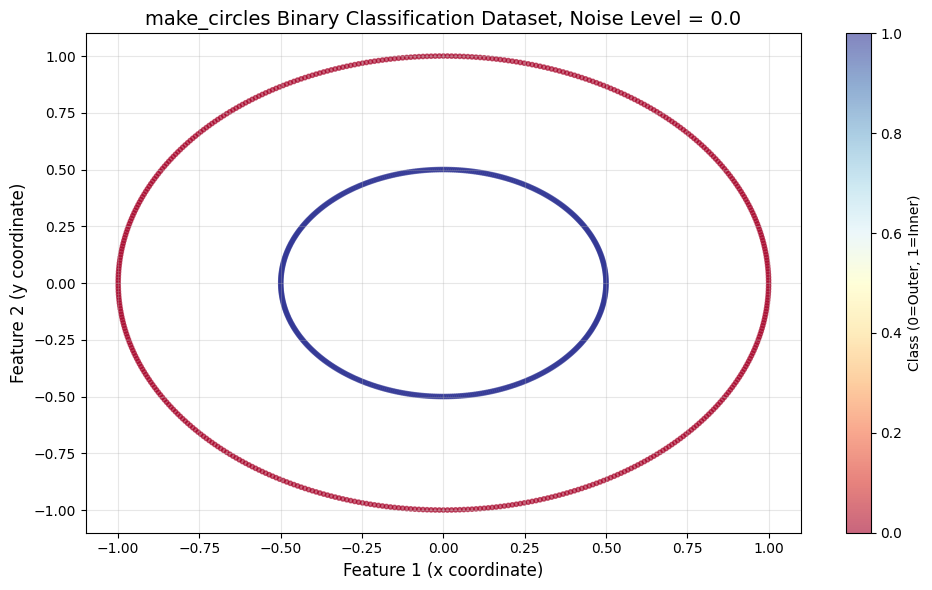

  - noise=0.03 circles


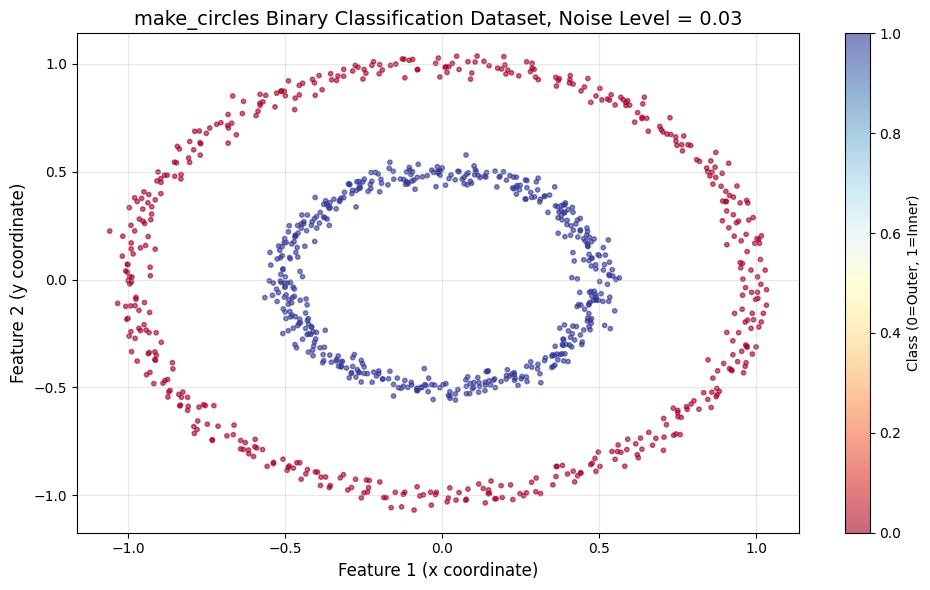

  - noise=0.1 circles


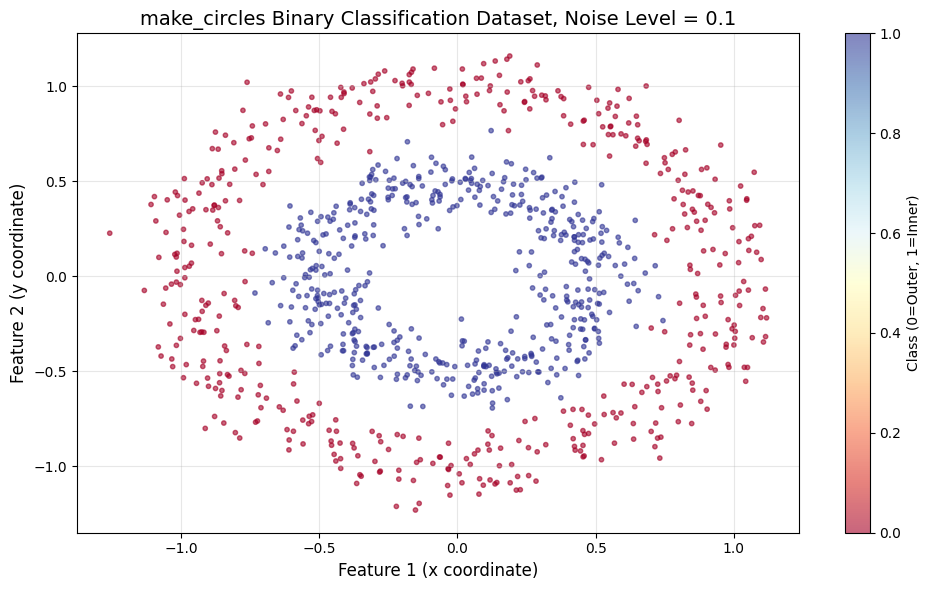


Observation: As noise increases, the boundary between classes becomes more blurred


In [9]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)

# Exercise 1: Experiment with different noise levels
print("\nExercise 1: Experiment with noise levels")
print("Try different noise values in make_circles:")
print("  - noise=0.0 (perfect circles)")
print("  - noise=0.03 (default)")
print("  - noise=0.1 (very noisy)")
print("Tip: Modify the 'noise' parameter in make_circles()")

for NOISE_LEVEL in [0.0, 0.03, 0.1]:
    print(f"  - noise={NOISE_LEVEL} circles")

    X, y = make_circles(
        n_samples=n_samples,
        noise=NOISE_LEVEL,
        random_state=42,
        factor=0.5,
    )

    #Visualize
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
    plt.title(f'make_circles Binary Classification Dataset, Noise Level = {NOISE_LEVEL}', fontsize=14)
    plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
    plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class (0=Outer, 1=Inner)')
    plt.tight_layout()
    plt.show()

print("\nObservation: As noise increases, the boundary between classes becomes more blurred")


Exercise 2: Try different random seeds
Set random_state to different values (42, 123, 456)
  - random_state=42


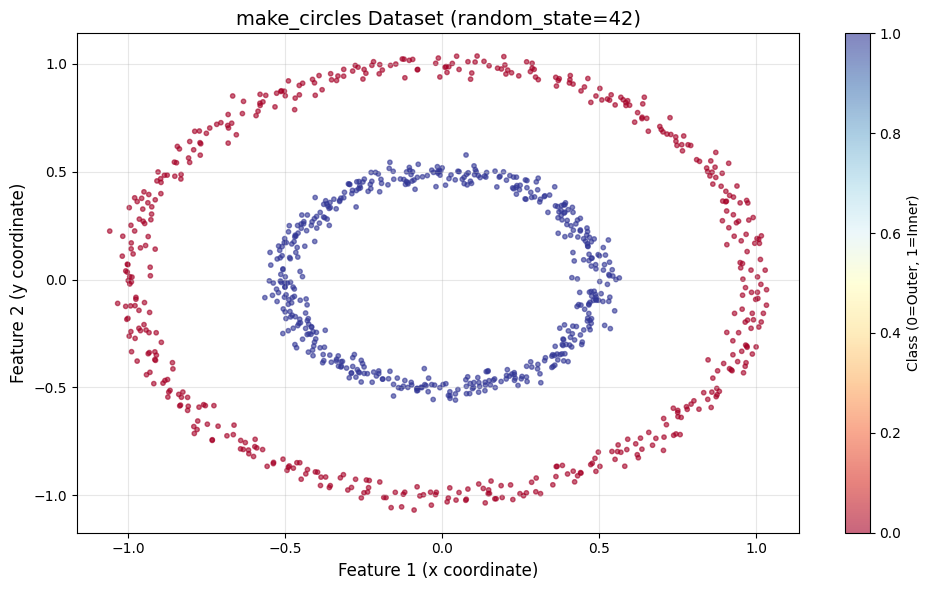

  - random_state=123


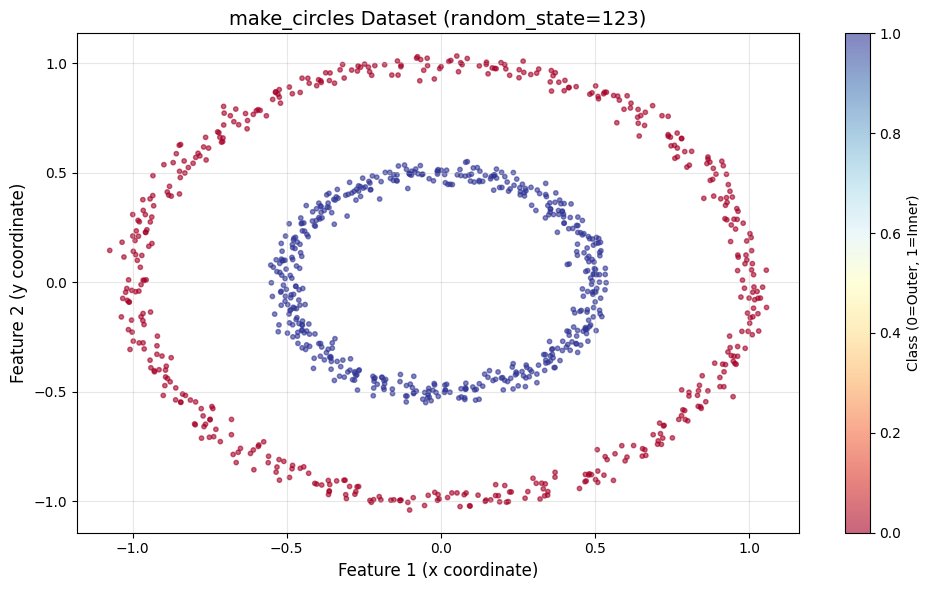

  - random_state=456


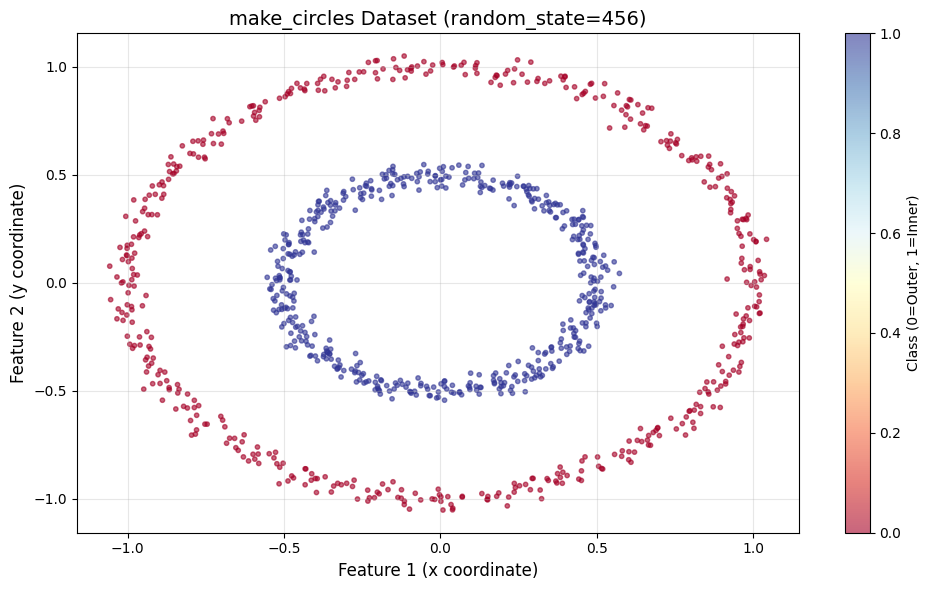


Observation: Different random seeds create different data arrangements,
but the underlying pattern (concentric circles) remains the same.
This demonstrates the importance of setting seeds for reproducible experiments!


In [10]:
# Exercise 2: Try different random seeds
print("\nExercise 2: Try different random seeds")
print("Set random_state to different values (42, 123, 456)")
random_seed = [42, 123, 456]
for rs in random_seed:
    print(f"  - random_state={rs}")

    torch.manual_seed(rs)
    np.random.seed(rs)

    X, y = make_circles(
        n_samples=n_samples,
        noise=0.03,
        random_state=rs,
        factor=0.5,
    )
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=10, alpha=0.6)
    plt.title(f'make_circles Dataset (random_state={rs})', fontsize=14)
    plt.xlabel('Feature 1 (x coordinate)', fontsize=12)
    plt.ylabel('Feature 2 (y coordinate)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Class (0=Outer, 1=Inner)')
    plt.tight_layout()
    plt.show()

print("\nObservation: Different random seeds create different data arrangements,")
print("but the underlying pattern (concentric circles) remains the same.")
print("This demonstrates the importance of setting seeds for reproducible experiments!")



Exercise 3: Change train/test split ratio
Try different test_size values:
  Split 0.2: Train=800, Test=200 samples
  Split 0.3: Train=700, Test=300 samples
  Split 0.5: Train=500, Test=500 samples

Split ratio comparison
  - test_size=0.2: 49.50%
  - test_size=0.3: 52.00%
  - test_size=0.5: 48.00%


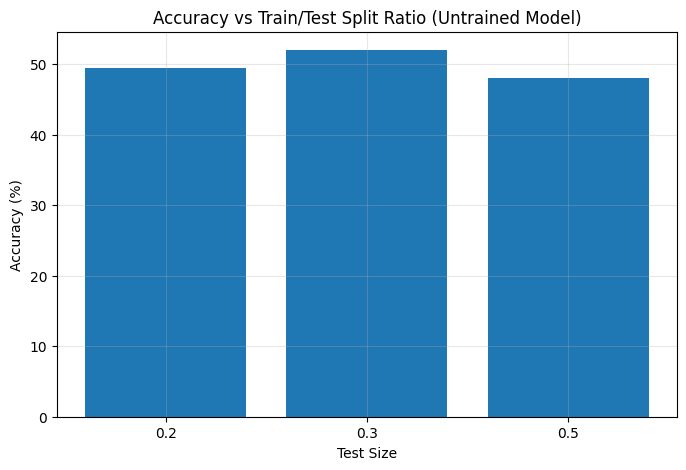


Observation: Notice that accuracy remains around 50% regardless of split ratio.
This is because the LINEAR model hasn't been trained yet - it's just random initialization!
The split ratio affects dataset size, not untrained model performance.


In [11]:
# Exercise 3: Change train/test split ratio
print("\nExercise 3: Change train/test split ratio")
print("Try different test_size values:")

torch.manual_seed(42)
np.random.seed(42)
X, y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state=42,
    factor=0.5,
)

TEST_SIZE = [0.2, 0.3, 0.5]
results = {}

for test_size in TEST_SIZE:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    #Convert tensor and device
    X_train = torch.FloatTensor(X_train).to(device)
    y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
    X_test = torch.FloatTensor(X_test).to(device)
    y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

    print(f"  Split {test_size}: Train={len(X_train)}, Test={len(X_test)} samples")

    #Create model
    model_temp = CircleModelV0(input_size=2, hidden_size=8, output_size=1)
    model_temp = model_temp.to(device)

    #Evaluate
    model_temp.eval()
    with torch.inference_mode():
        test_logits = model_temp(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()
    accuracy = (test_preds == y_test).float().mean()
    results[test_size] = accuracy

print(f"\nSplit ratio comparison")
for test_size, accuracy in results.items():
    print(f"  - test_size={test_size}: {accuracy.item()*100:.2f}%")

# Visualize split comparison
plt.figure(figsize=(8, 5))
plt.bar([str(ts) for ts in results.keys()],
        [acc.item()*100 for acc in results.values()])
plt.xlabel('Test Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Train/Test Split Ratio (Untrained Model)')
plt.grid(True, alpha=0.3)
plt.show()

#Conclusion
print("\nObservation: Notice that accuracy remains around 50% regardless of split ratio.")
print("This is because the LINEAR model hasn't been trained yet - it's just random initialization!")
print("The split ratio affects dataset size, not untrained model performance.")


In [12]:
# Exercise 4: Explore different hidden sizes
print("\nExercise 4: Explore different hidden sizes")
print("Try different hidden_size values:")
print("  - hidden_size=4")
print("  - hidden_size=8 (default)")
print("  - hidden_size=16")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

HIDDEN_SIZES = [4, 8, 16]
results = {}

for hidden_size in HIDDEN_SIZES:

    print(f"  hidden_size={hidden_size}")

    model_temp2 = CircleModelV0(input_size=2, hidden_size=hidden_size, output_size=1)
    model_temp2 = model_temp2.to(device)

    total_params = sum(p.numel() for p in model_temp2.parameters())
    print(f"  Total parameters: {total_params:,}")

    #Eval
    model_temp2.eval()
    with torch.inference_mode():
        test_logits = model_temp2(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()
    accuracy = (test_preds == y_test).float().mean()
    results[hidden_size] = accuracy

for hidden_size, accuracy in results.items():
    print(f"\n  hidden_size={hidden_size}: {accuracy.item()*100:.2f}%")

print("Tip: Modify the 'hidden_size' parameter in CircleModelV0()")

print("\nObservation: All models show ~50% accuracy because they're UNTRAINED.")
print("Hidden size affects MODEL CAPACITY (ability to learn), not initial performance.")
print("Larger hidden sizes = more parameters = more capacity to learn complex patterns.")



Exercise 4: Explore different hidden sizes
Try different hidden_size values:
  - hidden_size=4
  - hidden_size=8 (default)
  - hidden_size=16
  hidden_size=4
  Total parameters: 17
  hidden_size=8
  Total parameters: 33
  hidden_size=16
  Total parameters: 65

  hidden_size=4: 37.50%

  hidden_size=8: 51.50%

  hidden_size=16: 50.00%
Tip: Modify the 'hidden_size' parameter in CircleModelV0()

Observation: All models show ~50% accuracy because they're UNTRAINED.
Hidden size affects MODEL CAPACITY (ability to learn), not initial performance.
Larger hidden sizes = more parameters = more capacity to learn complex patterns.



Exercise 5: Data exploration
Answer these questions:
 What happens if you increase the noise?


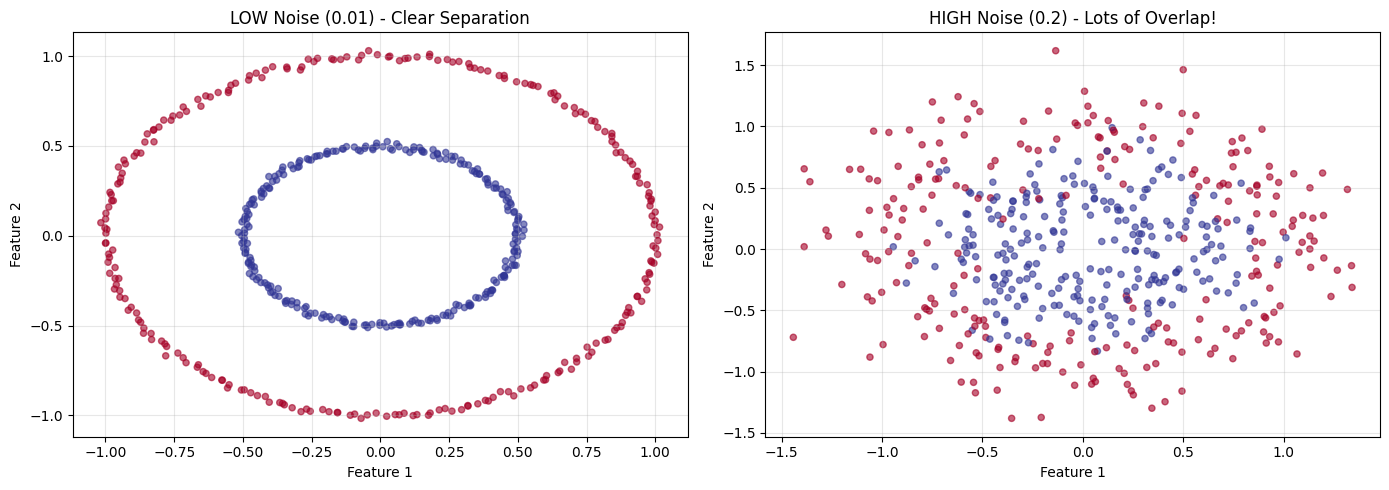


ANSWER:
 Low noise = Points form clear circles (easy to classify)
 High noise = Points scatter and overlap (hard to classify)
 More noise = Harder for the model to learn!
  - Why does the initial model have ~50% accuracy?
  Model 1: 37.50% accuracy
  Model 2: 53.50% accuracy
  Model 3: 50.00% accuracy
  Model 4: 45.00% accuracy
  Model 5: 52.50% accuracy

Average accuracy: 47.70%

ANSWER:
 Untrained models have RANDOM weights
 Random weights = Random guesses
 Binary classification (2 classes) = 50% chance by guessing
 Like flipping a coin: Heads or Tails = 50/50!
 After TRAINING, accuracy will improve!
  Can a linear model separate concentric circles?


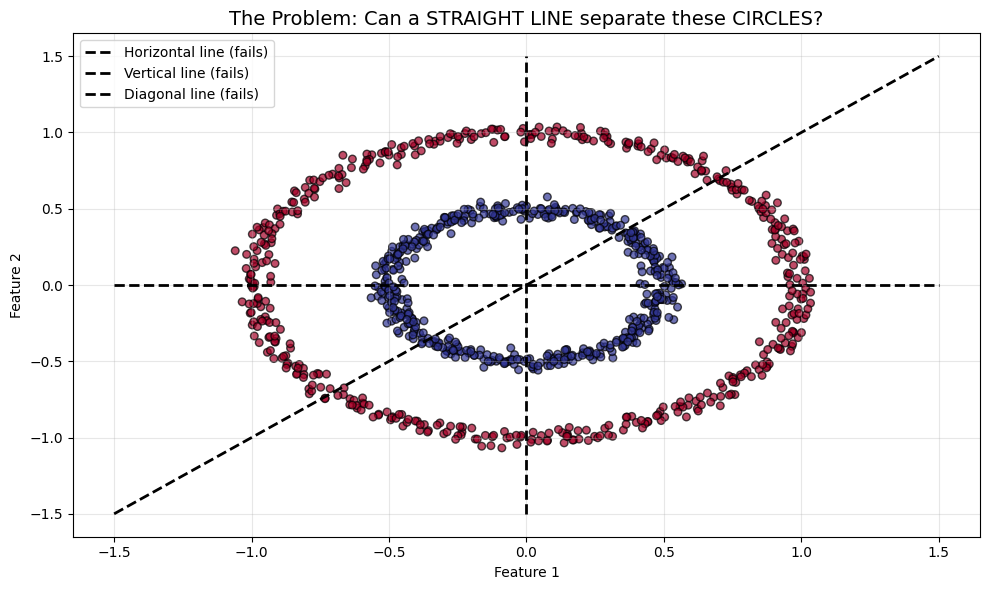


ANSWER: NO!
 Linear models can ONLY draw straight lines
 Circles need CURVED boundaries
  This problem is 'non-linearly separable'

 SOLUTION:
  We need to add NON-LINEAR activation functions!
 functions like ReLU, Sigmoid, Tanh create curves
 Coming next: CircleModelV1 with ReLU activation!
Tip: Visualize, experiment, and run the code!


In [13]:
# Exercise 5: Data exploration
print("\nExercise 5: Data exploration")
print("Answer these questions:")
print(" What happens if you increase the noise?")

# Low noise
X_low, y_low = make_circles(n_samples=500, noise=0.01, random_state=42, factor=0.5)

# High noise
X_high, y_high = make_circles(n_samples=500, noise=0.2, random_state=42, factor=0.5)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_low[:, 0], X_low[:, 1], c=y_low, cmap='RdYlBu', s=20, alpha=0.6)
axes[0].set_title('LOW Noise (0.01) - Clear Separation', fontsize=12)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_high[:, 0], X_high[:, 1], c=y_high, cmap='RdYlBu', s=20, alpha=0.6)
axes[1].set_title('HIGH Noise (0.2) - Lots of Overlap!', fontsize=12)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nANSWER:")
print(" Low noise = Points form clear circles (easy to classify)")
print(" High noise = Points scatter and overlap (hard to classify)")
print(" More noise = Harder for the model to learn!")

#------------------------------

print("  - Why does the initial model have ~50% accuracy?")

accuracies = []
for i in range(5):
    # Create new model with random weights
    new_model = CircleModelV0(input_size=2, hidden_size=8, output_size=1)
    new_model = new_model.to(device)

    # Test it (no training)
    new_model.eval()
    with torch.inference_mode():
        logits = new_model(X_test)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).long()

    acc = (preds == y_test).float().mean().item()
    accuracies.append(acc)
    print(f"  Model {i+1}: {acc*100:.2f}% accuracy")

avg_acc = np.mean(accuracies)
print(f"\nAverage accuracy: {avg_acc*100:.2f}%")

print("\nANSWER:")
print(" Untrained models have RANDOM weights")
print(" Random weights = Random guesses")
print(" Binary classification (2 classes) = 50% chance by guessing")
print(" Like flipping a coin: Heads or Tails = 50/50!")
print(" After TRAINING, accuracy will improve!")

#--------------------------------

print("  Can a linear model separate concentric circles?")
#Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=30, alpha=0.7, edgecolors='black')
plt.title('The Problem: Can a STRAIGHT LINE separate these CIRCLES?', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Draw some example straight lines
plt.plot([-1.5, 1.5], [0, 0], 'k--', linewidth=2, label='Horizontal line (fails)')
plt.plot([0, 0], [-1.5, 1.5], 'k--', linewidth=2, label='Vertical line (fails)')
plt.plot([-1.5, 1.5], [-1.5, 1.5], 'k--', linewidth=2, label='Diagonal line (fails)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nANSWER: NO!")
print(" Linear models can ONLY draw straight lines")
print(" Circles need CURVED boundaries")
print("  This problem is 'non-linearly separable'")
print("\n SOLUTION:")
print("  We need to add NON-LINEAR activation functions!")
print(" functions like ReLU, Sigmoid, Tanh create curves")
print(" Coming next: CircleModelV1 with ReLU activation!")

print("Tip: Visualize, experiment, and run the code!")

In [14]:
print("\n" + "=" * 60)
print("Exercise 1 Complete!")
print("Remember: If in doubt, run the code!")
print("Remember: Experiment, experiment, experiment!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)


Exercise 1 Complete!
Remember: If in doubt, run the code!
Remember: Experiment, experiment, experiment!
Remember: Visualize, visualize, visualize!
